In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
data_dir = os.path.join(os.getcwd(), 'data')
data_int = os.path.join(data_dir, 'Interior')
data_ext = os.path.join(data_dir, 'Exterior')

In [3]:
l = []
image_files = [file for file in os.listdir(data_int) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
num_train = int(len(image_files) * 0.7)
num_test = int(len(image_files) * 0.2)
selected_images = random.sample(image_files, num_train)


In [4]:
train_dest_file = os.path.join(data_dir, 'train')
test_dest_file = os.path.join(data_dir, 'test')
val_dest_file = os.path.join(data_dir, 'val')


In [5]:
for image in selected_images:
    
    source_file = os.path.join(data_int, image)
    if not os.path.exists(train_dest_file ):
        os.makedirs(train_dest_file )
    destination_file = os.path.join(train_dest_file, image)
    shutil.copy(source_file, destination_file)

In [6]:
def split_data(root_folder, data, folders, split):

    image_files = [file for file in os.listdir(data) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
    for folder in folders:
        num_samples = int(len(image_files) * split[folders.index(folder)] * 0.01)

        for image in os.listdir(data)[:num_samples]:
            source_file = os.path.join(data, image)

            dest_folder = os.path.join(root_folder, folder, data.split('/')[-1])
            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)
            destination_file = os.path.join(dest_folder, image)
            shutil.move(source_file, destination_file)
        

In [7]:
folders = ['train', 'test', 'val']
split = [80, 10, 10]

split_data(data_dir, data_int, folders, split)
split_data(data_dir, data_ext, folders, split)

(-0.5, 1499.5, 1000.5, -0.5)

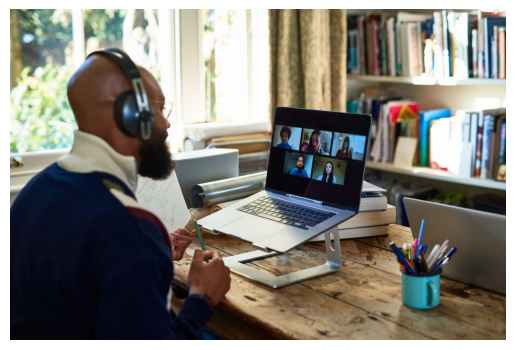

In [8]:
img = mpimg.imread('/home/kmaev/dev/ML_Rebelway_course/ml_course_homework/img/home_office.jpg')
plt.imshow(img)
plt.axis('off')

In [9]:
print(img.shape)

(1001, 1500, 3)


In [10]:

original_shape = img.shape
new_shape = (480, 854, 3)

resized_image = cv2.resize(img, (new_shape[1], new_shape[0]))  

print("Original shape:", img.shape)
print("Resized shape:", resized_image.shape)

if len(resized_image.shape) == 2:
    resized_image = np.expand_dims(resized_image, axis=-1)

if resized_image.shape[-1] == 1 and new_shape[-1] == 3:
    resized_image = np.repeat(resized_image, 3, axis=-1)

print("Final shape:", resized_image.shape)

Original shape: (1001, 1500, 3)
Resized shape: (480, 854, 3)
Final shape: (480, 854, 3)


In [11]:
print(resized_image.shape)

(480, 854, 3)


In [12]:
import cv2
import os
import glob


def flip_images(input_folder, output_folder, new_name):
    os.makedirs(output_folder, exist_ok=True)
    image_files = glob.glob(os.path.join(input_folder, '*'))
    for image_file in image_files:
        image = cv2.imread(image_file)
        flipped_horizontally = cv2.flip(image, 1)
        flipped_vertically = cv2.flip(image, 0)

        file_name = os.path.basename(image_file)
        if not file_name.split('/')[-1].startswith(new_name):
            flipped_horizontally_name = os.path.join(output_folder, f'{new_name}_h_{file_name}')
            flipped_vertically_name = os.path.join(output_folder, f'{new_name}_v_{file_name}')
            cv2.imwrite(flipped_horizontally_name, flipped_horizontally)
            cv2.imwrite(flipped_vertically_name, flipped_vertically)

In [13]:
def move_from_temp_to_folder(folder, temp):
    image_files = glob.glob(os.path.join(temp, '*'))
    for image_file in image_files:
        if not os.path.exists(folder):
                os.makedirs(folder)
        destination_file = os.path.join(folder, image_file.split('/')[-1])
        shutil.move(image_file, destination_file)
        
    

In [14]:
folders = [train_dest_file, test_dest_file, val_dest_file]
for folder in folders:
    
    input_folder_ext = os.path.join(folder, 'Exterior')
    output_folder = os.path.join(data_dir, '_temp')
    
    flip_images(input_folder_ext,output_folder, 'flipped')
    move_from_temp_to_folder(input_folder_ext,output_folder)

In [15]:

for folder in folders:

    input_folder_int = os.path.join(folder, 'Interior')
    output_folder = os.path.join(data_dir, '_temp')
    
    flip_images(input_folder_int,output_folder, 'flipped')
    move_from_temp_to_folder(input_folder_int,output_folder)